In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.constants import m_e, e ,c 
from astropy import units as u
from scipy.constants import physical_constants
from scipy.constants import physical_constants, c as cc

In [2]:
C_IV_K = 1548.187e-8  # cm
C_IV_H = 1550.772e-8  # cm

C_IV_K_A = 1548.187  # cm
C_IV_H_A = 1550.772  # cm

cc = c.to(u.cm / u.s).value  # cm/s
cc_k = c.to(u.km / u.s).value #km / s
v_th_CIV = 11.7673179819719e5  # cm/s

K_gamma = 2.65e+8
H_gamma = 2.64e+8
f_CIV_K = 0.190
f_CIV_H = 0.0952



In [19]:
C_IV_K = 1548.187e-8  # cm
C_IV_H = 1550.772e-8  # cm

C_IV_K_A = 1548.187  # cm
C_IV_H_A = 1550.772  # cm

cc = c.to(u.cm / u.s).value  # cm/s
cc_k = c.to(u.km / u.s).value #km / s
v_th_CIV = 11.7673179819719e5  # cm/s

K_gamma = 2.65e+8
H_gamma = 2.64e+8
f_CIV_K = 0.190
f_CIV_H = 0.0952



def voigt(lambda_x, v_th, line_K, line_gamma_K, f_K):
    delta_D = v_th / line_K  #1/s

    a = line_gamma_K / (np.pi * 4 * delta_D) 

    yy_x = np.arange(-1000, 1000, 0.0001)
    dy = abs(yy_x[1] - yy_x[0])
    sol = np.zeros(len(lambda_x))
    x_K = np.zeros(len(lambda_x))

    # Precompute exp(-yy_x^2) since it doesn't depend on xx
    exp_u = np.exp(-yy_x**2)

    # Calculate x_K array for all lambda_x values at once
    for ii, xx in enumerate(lambda_x):
        x = (1 / (xx * 1e-8) - 1 / line_K) * cc / delta_D
        exp_d = (x - yy_x)**2 + a**2
        exp = exp_u / exp_d
        F_lamb = np.sum(exp) * dy

        sol[ii] = F_lamb
        x_K[ii] = x

    return x_K, sol * a / np.pi, delta_D

xx = np.arange(1520,1570,0.001)

# Usage with existing variables (assuming they are already defined)
xx_K, voigt_K, delta_D_K = voigt(xx, v_th_CIV, C_IV_K, K_gamma, f_CIV_K)
xx_30, voigt_30, delta_D_30 = voigt(xx, 30e5, C_IV_K, K_gamma, f_CIV_K)
xx_50, voigt_50, delta_D_50 = voigt(xx, 50e5, C_IV_K, K_gamma, f_CIV_K)


KeyboardInterrupt: 

(-10.0, 10.0)

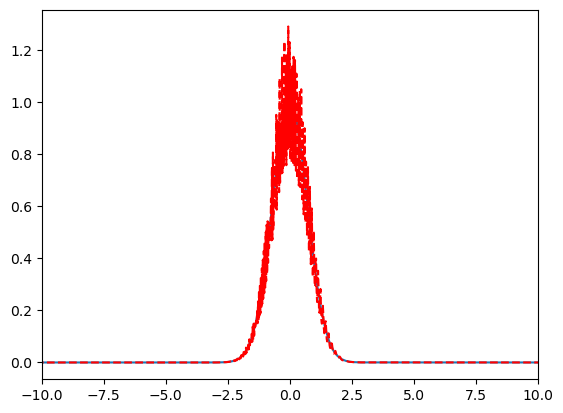

In [ ]:
plt.plot(xx_K,voigt_K)
# plt.xlim(-10,10)

plt.plot(xx_50,voigt_50,'r--')
plt.xlim(-10,10)
